In [1]:
## Load all required packages
%pylab inline --no-import-all
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from keras.models import Sequential
from keras import layers
from keras import models
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical
from keras.metrics import CategoricalAccuracy, categorical_accuracy
import seaborn as sns
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


C:\Users\meret\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
## EDA and preprocessing

In [2]:
## Load data
with np.load("training-dataset.npz") as data:
    img = data["x"] ## test dataset
    lbl = data["y"]

In [3]:
## Check shapes and types of the dataset
print(img.shape)
print(lbl.shape)
print(type(img))
print(type(lbl))

(124800, 784)
(124800,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


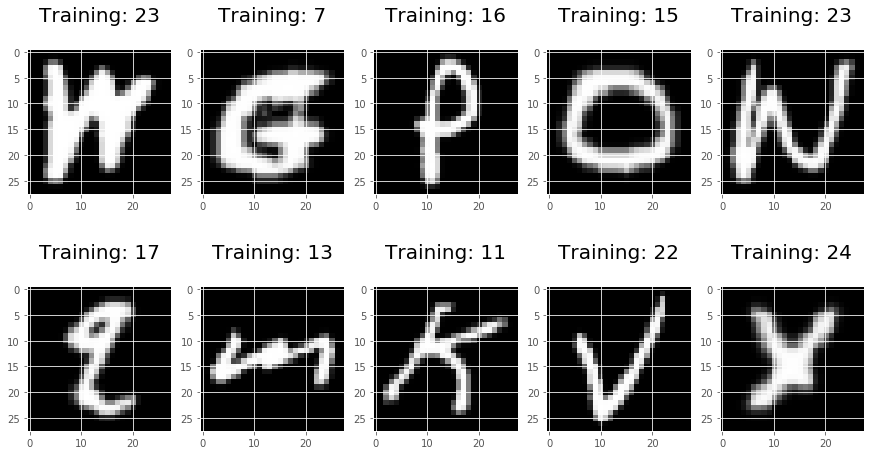

In [4]:
## Display example digits
plt.figure(figsize=(15,8))
for index, (image, label) in enumerate(zip(img[0:10], lbl[0:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)
    plt.savefig('sample.pdf')

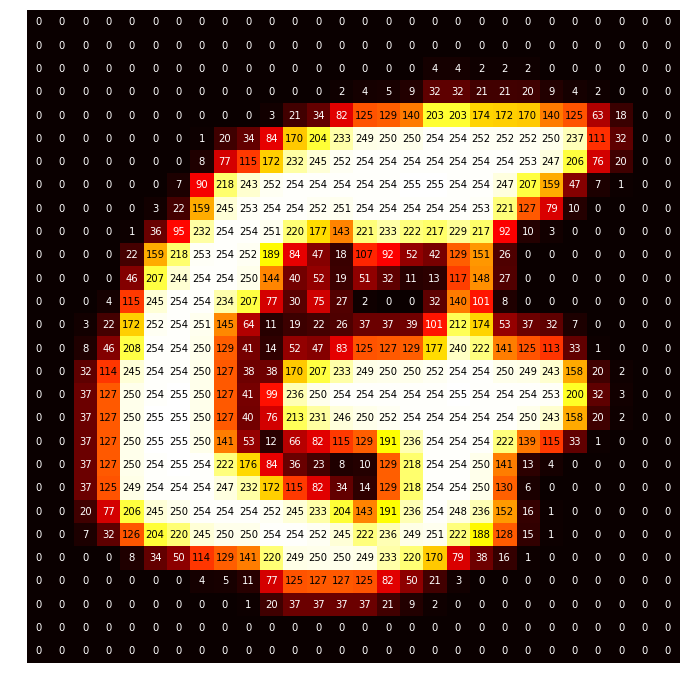

In [5]:
## Visualize one instance showing all features (28 x 28 pixels = 784)
# zero (black) indicated that the feature is zero. The darker the line, the higher the number e.g. 254.
# compare this with the picture above
def visualize_input(img, ax):
    ax.imshow(img, cmap='hot')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)

visualize_input(img[1,:].reshape(28,28), ax)

#plt.title(img[3,0])
plt.axis("off")
#plt.show()
plt.savefig('sample1.pdf')

## source: https://www.kaggle.com/darkside92/simple-best-digit-recognizer-with-cnn-top-5/comments#497794

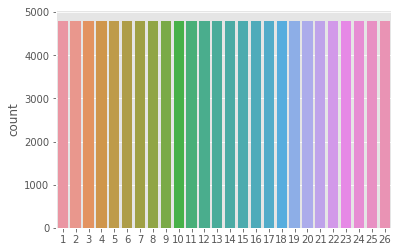

In [6]:
## Check if the labels are even distributed - this is the case
g = sns.countplot(lbl)

In [ ]:
# Linear Models

In [5]:
## Load data again - Note: Data does not have to be binarized 
with np.load("training-dataset.npz") as data:
    img = data["x"] ## test dataset
    lbl = data["y"]

In [6]:
## Check shapes and types of the dataset
print(img.shape)
print(lbl.shape)
print(type(img))
print(type(lbl))

(124800, 784)
(124800,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
## Split into train and test sets (80 vs 20%)
x_train, x_test, y_train, y_test = train_test_split(img, lbl, test_size=0.2, random_state=0)

In [8]:
# Reshape the images data (each pixel can have a value between 0.0 to 1.0)
norm = MinMaxScaler()
x_train = norm.fit_transform(x_train)
x_test = norm.fit_transform(x_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

C:\Users\meret\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\meret\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
## Logistic Regression
# In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option 
# is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’. 
logisticRegr = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, verbose = 1, random_state=0)

In [10]:
# Fit the model
logisticRegr.fit(x_train, y_train)

C:\Users\meret\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.4s finished


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=1, warm_start=False)

In [11]:
# Make predictions with the test set
predictions = logisticRegr.predict(x_test)
print(predictions[0:10,])

[25 22 14 26 15 11 24  7  8 25]


In [12]:
acc = accuracy_score(logisticRegr.predict(x_train), y_train)
print("Train Accuracy: {:.3}".format(acc))

Train Accuracy: 0.736


In [13]:
acc = accuracy_score(predictions, y_test)
print("Test Accuracy: {:.3}".format(acc))

Test Accuracy: 0.717


In [19]:
## SGD Classifier from sklearn
sgd_clf = SGDClassifier(loss='log', random_state=0, verbose=0)
result = sgd_clf.fit(x_train, y_train)

C:\Users\meret\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [20]:
acc_sgd = accuracy_score(sgd_clf.predict(x_train), y_train)
print("Train Accuracy: {:.3}".format(acc_sgd))

Train Accuracy: 0.65


In [21]:
acc_sgd = accuracy_score(sgd_clf.predict(x_test), y_test)
print("Test Accuracy: {:.3}".format(acc_sgd))

Test Accuracy: 0.637


In [ ]:
## Non-linear models

In [22]:
## Random Forest Classifier from sklearn
rdf_clf = RandomForestClassifier(random_state=0)
rdf_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [23]:
acc_rdf = accuracy_score(rdf_clf.predict(x_train), y_train)
print("Train Accuracy: {:.3}".format(acc_rdf))

Train Accuracy: 0.997


In [24]:
acc_rdf = accuracy_score(rdf_clf.predict(x_test), y_test)
print("Test Accuracy: {:.3}".format(acc_rdf))

Test Accuracy: 0.829


In [25]:
## Multi-layer perceptron classifier from sklearn ## TBC: Shall we use different parameters, how can we
# get the validation score
mlp = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', alpha=0.0001,
                    solver='adam', tol=1e-4, random_state=0, validation_fraction=0.1, early_stopping=True,
                    learning_rate_init=.001, verbose=True)

In [26]:
mlp.fit(x_train, y_train)

Iteration 1, loss = 1.13461454
Validation score: 0.763822
Iteration 2, loss = 0.67567533
Validation score: 0.811999
Iteration 3, loss = 0.53583442
Validation score: 0.841947
Iteration 4, loss = 0.46140789
Validation score: 0.848057
Iteration 5, loss = 0.41208509
Validation score: 0.863782
Iteration 6, loss = 0.37826205
Validation score: 0.870493
Iteration 7, loss = 0.35250549
Validation score: 0.876803
Iteration 8, loss = 0.33043271
Validation score: 0.876803
Iteration 9, loss = 0.31350187
Validation score: 0.882612
Iteration 10, loss = 0.29911965
Validation score: 0.884415
Iteration 11, loss = 0.28600960
Validation score: 0.885417
Iteration 12, loss = 0.27522292
Validation score: 0.885517
Iteration 13, loss = 0.26403562
Validation score: 0.887220
Iteration 14, loss = 0.25392547
Validation score: 0.884515
Iteration 15, loss = 0.24778664
Validation score: 0.888421
Iteration 16, loss = 0.23915013
Validation score: 0.889523
Iteration 17, loss = 0.23206870
Validation score: 0.883614
Iterat

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(128,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [27]:
acc_mlp = accuracy_score(mlp.predict(x_train), y_train)
print("Train Accuracy: {:.3}".format(acc_mlp))

Train Accuracy: 0.926


In [28]:
acc_mlp = accuracy_score(mlp.predict(x_test), y_test)
print("Accuracy: {:.3}".format(acc_mlp))

Accuracy: 0.887


In [ ]:
## MLP Base - Keras

In [29]:
## Load data again
with np.load("training-dataset.npz") as data:
    img = data["x"] ## test dataset
    lbl = data["y"]

In [30]:
## Split into train and test sets (80 vs 20%)
x_train, x_test, y_train, y_test = train_test_split(img, lbl, test_size=0.2, random_state=0)

In [31]:
## Split into train and val sets (80 vs 20%)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

In [32]:
# Change data tyoe to float and normalize pixel data
norm = MinMaxScaler()
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
X = norm.fit_transform(x_train)
X_val = norm.fit_transform(x_val)
X_test = norm.fit_transform(x_test)

In [35]:
## Encode categorical label data & adjust naming
lb = LabelBinarizer()
Y = lb.fit_transform(y_train)
Y_val = lb.fit_transform(y_val)
#Y_test = lb.fit_transform(y_test)

In [36]:
## Check the shape
print(X.shape)
print(Y.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(79872, 784)
(79872, 26)
(19968, 784)
(19968, 26)
(24960, 784)
(24960,)


In [37]:
## Define a multi perceptron model
model = Sequential()
# Add two hidden layers, use the relu activation
# Input dimenstion has to be equal to the number of features in our case pixels
model.add(Dense(256, input_dim=784, activation='relu'))
model.add(Dense(128, activation='relu'))
# The final layer uses softmax activation function since we are looking into a multiclass classification problem
model.add(Dense(26, activation='softmax'))
# Use the Adam optimizer. Adam works similar to regular SGD 
lr = 0.001
opt = Adam(lr)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.


In [38]:
# training the model and saving metrics in history
history = model.fit(X, Y,
          batch_size=128, epochs=5,
          verbose=1,
          validation_data=(X_val, Y_val))

Instructions for updating:
Use tf.cast instead.
Train on 79872 samples, validate on 19968 samples
Epoch 1/5
79872/79872 [==============================] - 7s 91us/step - loss: 0.8658 - accuracy: 0.7465 - val_loss: 0.5274 - val_accuracy: 0.8413
Epoch 2/5
79872/79872 [==============================] - 7s 94us/step - loss: 0.4314 - accuracy: 0.8665 - val_loss: 0.4276 - val_accuracy: 0.8661
Epoch 3/5
79872/79872 [==============================] - 8s 97us/step - loss: 0.3372 - accuracy: 0.8931 - val_loss: 0.3707 - val_accuracy: 0.8834
Epoch 4/5
79872/79872 [==============================] - 7s 93us/step - loss: 0.2888 - accuracy: 0.9072 - val_loss: 0.3475 - val_accuracy: 0.8912
Epoch 5/5
79872/79872 [==============================] - 7s 87us/step - loss: 0.2511 - accuracy: 0.9166 - val_loss: 0.3426 - val_accuracy: 0.8918


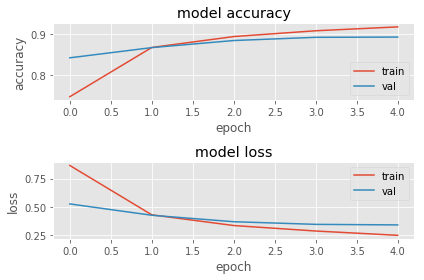

In [39]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

plt.tight_layout()

In [40]:
loss_and_metrics_train = model.evaluate(X, Y, verbose=2)
loss_and_metrics_val = model.evaluate(X_val, Y_val, verbose=2)

print("Train Loss", loss_and_metrics_train[0])
print("Train Accuracy", loss_and_metrics_train[1])
print()
print("Val Loss", loss_and_metrics_val[0])
print("Val Accuracy", loss_and_metrics_val[1])

Train Loss 0.21645354986629592
Train Accuracy 0.9286733865737915

Val Loss 0.34261155164896107
Val Accuracy 0.8917768597602844


In [ ]:
## CNN Model

In [41]:
## Load data
with np.load("training-dataset.npz") as data:
    img = data["x"] ## test dataset
    lbl = data["y"]

In [42]:
## Split into train and test sets (80 vs 20%)
x_train, x_test, y_train, y_test = train_test_split(img, lbl, test_size=0.2, random_state=0)

In [43]:
## Split into train and val sets (80 vs 20%)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

In [44]:
# Reshape to 28 x 28 pixels
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train = x_train.astype('float32') / 255
print(x_train.shape)

(79872, 28, 28, 1)


In [45]:
# Reshape to 28 x 28 pixels
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_val = x_val.astype('float32') / 255
print(x_val.shape)

(19968, 28, 28, 1)


In [46]:
# Reshape to 28 x 28 pixels
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_test = x_test.astype('float32') / 255
print(x_test.shape)

(24960, 28, 28, 1)


In [47]:
## Encode categorical label data
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_val = lb.fit_transform(y_val)
#y_test = lb.fit_transform(y_test)

In [48]:
# Check the shape after the split
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(79872, 28, 28, 1)
(79872, 26)
(19968, 28, 28, 1)
(19968, 26)
(24960, 28, 28, 1)
(24960,)


In [49]:
# Model 1

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Add a Flatten layer to the model
model.add(layers.Flatten())
# Add a Dense layer with 64 units and relu activation
model.add(layers.Dense(64, activation='relu'))
# Add the last Dense layer.
model.add(layers.Dense(26, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ["accuracy"])

In [50]:
history = model.fit(x_train, y_train,
          batch_size=32, epochs=5,
          verbose=1,
          validation_data=(x_val, y_val))

Train on 79872 samples, validate on 19968 samples
Epoch 1/5
79872/79872 [==============================] - 126s 2ms/step - loss: 0.5355 - accuracy: 0.8330 - val_loss: 0.2778 - val_accuracy: 0.9089
Epoch 2/5
79872/79872 [==============================] - 156s 2ms/step - loss: 0.2513 - accuracy: 0.9161 - val_loss: 0.2472 - val_accuracy: 0.9216
Epoch 3/5
79872/79872 [==============================] - 182s 2ms/step - loss: 0.2054 - accuracy: 0.9306 - val_loss: 0.2334 - val_accuracy: 0.9232
Epoch 4/5
79872/79872 [==============================] - 158s 2ms/step - loss: 0.1779 - accuracy: 0.9381 - val_loss: 0.2207 - val_accuracy: 0.9283
Epoch 5/5
79872/79872 [==============================] - 138s 2ms/step - loss: 0.1577 - accuracy: 0.9440 - val_loss: 0.2151 - val_accuracy: 0.9304


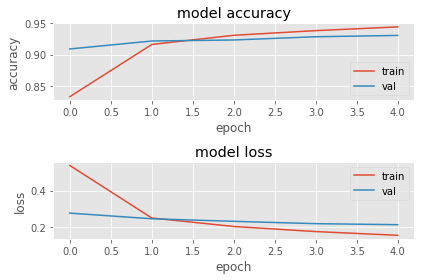

In [52]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

plt.tight_layout()

In [53]:
loss_and_metrics_train = model.evaluate(x_train, y_train, verbose=2)
loss_and_metrics_val = model.evaluate(x_val, y_val, verbose=2)

print("Train Loss", loss_and_metrics_train[0])
print("Train Accuracy", loss_and_metrics_train[1])
print()
print("Train Loss", loss_and_metrics_val[0])
print("Train Accuracy", loss_and_metrics_val[1])

Train Loss 0.13772389562729634
Train Accuracy 0.9507962465286255

Train Loss 0.21513956358196595
Train Accuracy 0.9304386973381042


In [54]:
# Model 2

model2 = models.Sequential()
model2.add(layers.Conv2D(26, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(52, (3, 3), activation='relu'))
# Add a Flatten layer to the model
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.4))
# Add a Dense layer with 64 units and relu activation
model2.add(layers.Dense(64, activation='relu'))
# Add the last Dense layer.
model2.add(layers.Dense(26, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ["accuracy"])

In [55]:
history = model2.fit(x_train, y_train,
          batch_size=32, epochs=5,
          verbose=1,
          validation_data=(x_val, y_val))

Train on 79872 samples, validate on 19968 samples
Epoch 1/5
79872/79872 [==============================] - 138s 2ms/step - loss: 0.5347 - accuracy: 0.8347 - val_loss: 0.3038 - val_accuracy: 0.9043
Epoch 2/5
79872/79872 [==============================] - 164s 2ms/step - loss: 0.2867 - accuracy: 0.9058 - val_loss: 0.2520 - val_accuracy: 0.9174
Epoch 3/5
79872/79872 [==============================] - 188s 2ms/step - loss: 0.2316 - accuracy: 0.9219 - val_loss: 0.2229 - val_accuracy: 0.9249
Epoch 4/5
79872/79872 [==============================] - 170s 2ms/step - loss: 0.2006 - accuracy: 0.9303 - val_loss: 0.2104 - val_accuracy: 0.9312
Epoch 5/5
79872/79872 [==============================] - 188s 2ms/step - loss: 0.1785 - accuracy: 0.9375 - val_loss: 0.2123 - val_accuracy: 0.9297


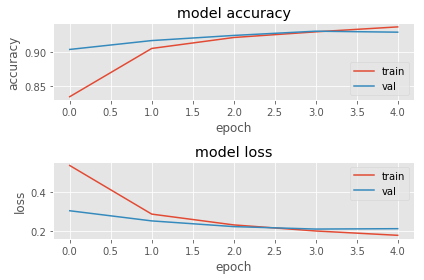

In [56]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

plt.tight_layout()

In [57]:
loss_and_metrics_train = model2.evaluate(x_train, y_train, verbose=2)
loss_and_metrics_val = model2.evaluate(x_val, y_val, verbose=2)

print("Train Loss", loss_and_metrics_train[0])
print("Train Accuracy", loss_and_metrics_train[1])
print()
print("Train Loss", loss_and_metrics_val[0])
print("Train Accuracy", loss_and_metrics_val[1])

Train Loss 0.12565740577403445
Train Accuracy 0.9551657438278198

Train Loss 0.2123428531534349
Train Accuracy 0.9297375679016113


In [56]:
## Compare model with different parameters

settings_train = []
settings_val = []

for a in ['tanh', 'relu']:
    for e in [1, 5, 10]:
        model = Sequential()
        model = models.Sequential()
        model.add(layers.Conv2D(32, (3, 3), activation=a, input_shape=(28, 28, 1)))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(64, (3, 3), activation=a))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(64, (3, 3), activation=a))
        model.add(layers.Flatten())
        model.add(layers.Dense(64, activation=a))
        model.add(layers.Dense(26, activation='softmax'))
                
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ["accuracy"])
        model.fit(x_train, y_train, batch_size=32, epochs=e, verbose=2, validation_data=(x_val, y_val))
        score_train = model.evaluate(x_train, y_train, verbose=2)
        score_val = model.evaluate(x_val, y_val, verbose=2)
        settings_train.append((a, e, score_train[0], score_train[1]))
        settings_val.append((a, e, score_val[0], score_val[1]))
        print(settings_train[-1])
        print(settings_val[-1])

best_loss_train = min(settings_train, key=lambda x: x[-2])
best_accuracy_train =  max(settings_train, key=lambda x: x[-1])
best_loss_val = min(settings_val, key=lambda x: x[-2])
best_accuracy_val =  max(settings_val, key=lambda x: x[-1])

print("Best settings according to train loss {}".format(best_loss_train))
print("Best settings according to train accuracy {}".format(best_accuracy_train))
print("---")
print("Best settings according to val loss {}".format(best_loss_val))
print("Best settings according to val accuracy {}".format(best_accuracy_val))

Train on 79872 samples, validate on 19968 samples
Epoch 1/1
 - 169s - loss: 0.5391 - accuracy: 0.8419 - val_loss: 0.3198 - val_accuracy: 0.8972
('tanh', 1, 0.2944075856089162, 0.9057366847991943)
('tanh', 1, 0.31978023177585924, 0.8972355723381042)
('tanh', 1, 0.33101893516305164, 0.8942708373069763)
Train on 79872 samples, validate on 19968 samples
Epoch 1/5
 - 170s - loss: 0.5361 - accuracy: 0.8413 - val_loss: 0.3127 - val_accuracy: 0.9009
Epoch 2/5
 - 163s - loss: 0.2727 - accuracy: 0.9116 - val_loss: 0.2804 - val_accuracy: 0.9123
Epoch 3/5
 - 167s - loss: 0.2340 - accuracy: 0.9230 - val_loss: 0.2714 - val_accuracy: 0.9131
Epoch 4/5
 - 169s - loss: 0.2120 - accuracy: 0.9290 - val_loss: 0.2581 - val_accuracy: 0.9166
Epoch 5/5
 - 170s - loss: 0.1948 - accuracy: 0.9334 - val_loss: 0.2498 - val_accuracy: 0.9223
('tanh', 5, 0.17500657878237036, 0.9397535920143127)
('tanh', 5, 0.24975078734599102, 0.9223257303237915)
('tanh', 5, 0.25827012092400436, 0.9169871807098389)
Train on 79872 samp

In [57]:
loss_and_metrics_train = model.evaluate(x_train, y_train, verbose=2)
loss_and_metrics_val = model.evaluate(x_val, y_val, verbose=2)

print("Train Loss", loss_and_metrics_train[0])
print("Train Accuracy", loss_and_metrics_train[1])
print()
print("Train Loss", loss_and_metrics_val[0])
print("Train Accuracy", loss_and_metrics_val[1])

Train Loss 0.07652042891439893
Train Accuracy 0.9696890115737915

Test Loss 0.23127476903729333
Test Accuracy 0.9336137771606445

Train Loss 0.22672146052205697
Train Accuracy 0.9361979365348816


In [58]:
## Make class predictions
pred_class = model.predict_classes(x_test)

In [61]:
print(pred_class.shape)

(24960,)


In [66]:
print(pred_class[0:5])

[23 21  0 25 14]


In [73]:
y_test_adj = y_test-1

In [76]:
print(y_test_adj.shape)

(24960,)


In [75]:
print(y_test_adj[0:5])

[23 21  0 25 14]


In [77]:
## accuracy per class
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test_adj, pred_class)
acc_per_class = matrix.diagonal()/matrix.sum(axis=1)
print(acc_per_class[0])
d = {}
for i in range(0,26):
    d[i] = round(acc_per_class[i],4)
print(d)

0.9367219917012448
{0: 0.9367, 1: 0.9558, 2: 0.9835, 3: 0.9529, 4: 0.9584, 5: 0.96, 6: 0.8574, 7: 0.9521, 8: 0.7337, 9: 0.9461, 10: 0.9766, 11: 0.711, 12: 0.9834, 13: 0.957, 14: 0.9619, 15: 0.9705, 16: 0.8468, 17: 0.9421, 18: 0.9813, 19: 0.9621, 20: 0.9447, 21: 0.9125, 22: 0.9714, 23: 0.9701, 24: 0.9487, 25: 0.9803}


In [78]:
# Classification report
print(classification_report(y_test_adj, pred_class))

             precision    recall  f1-score   support

          0       0.93      0.94      0.93       964
          1       0.98      0.96      0.97       928
          2       0.96      0.98      0.97       970
          3       0.94      0.95      0.95       934
          4       0.98      0.96      0.97       985
          5       0.95      0.96      0.96       949
          6       0.86      0.86      0.86       975
          7       0.95      0.95      0.95       939
          8       0.72      0.73      0.73       950
          9       0.94      0.95      0.94       927
         10       0.95      0.98      0.96       982
         11       0.72      0.71      0.72       917
         12       0.97      0.98      0.98       902
         13       0.94      0.96      0.95       953
         14       0.97      0.96      0.97       971
         15       0.98      0.97      0.97      1018
         16       0.87      0.85      0.86       940
         17       0.95      0.94      0.95   

In [79]:
## Confusion matrix
cm = metrics.confusion_matrix(y_test_adj, pred_class)

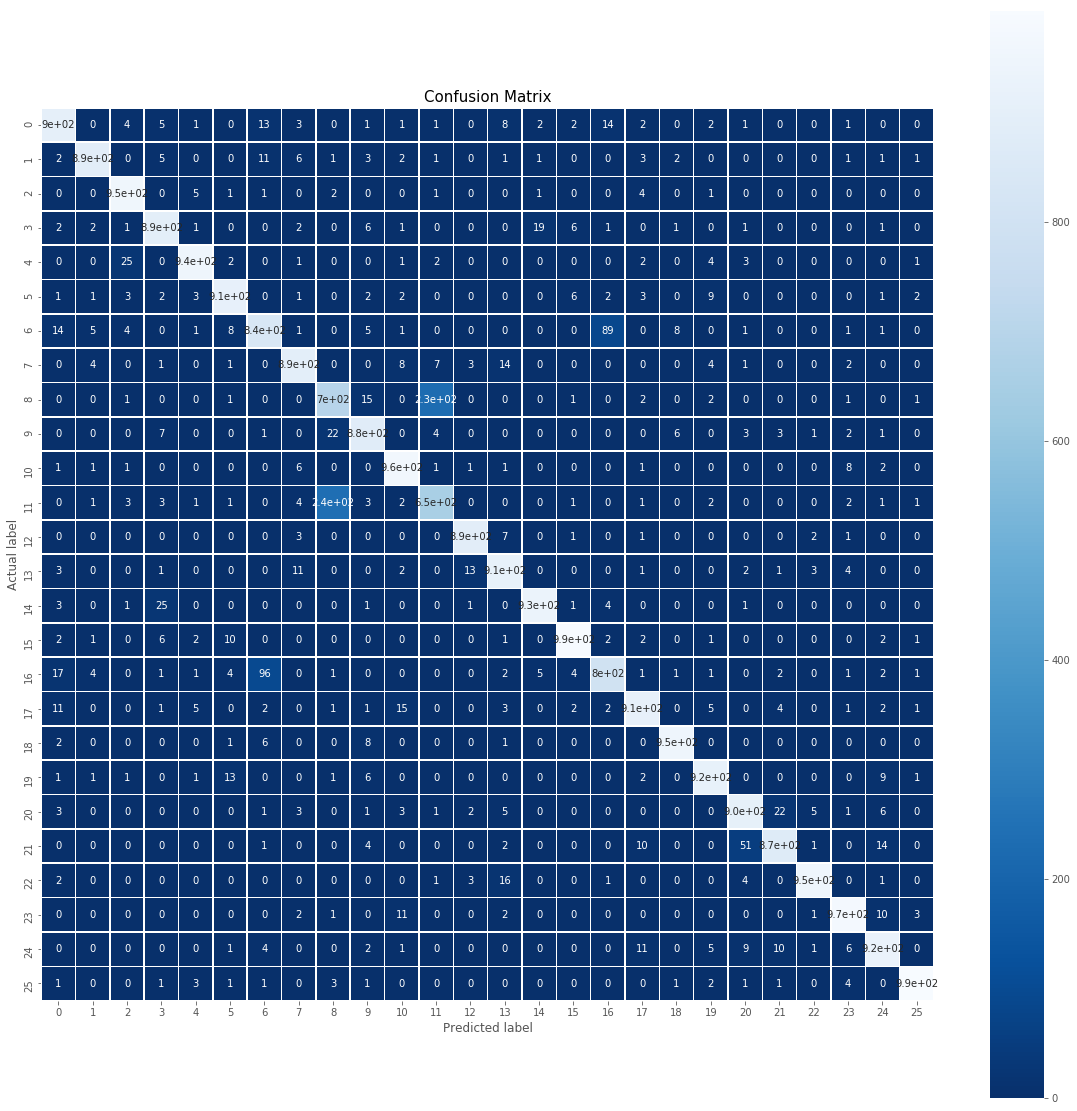

In [83]:
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15);
plt.savefig('Letters_NN.png')
plt.show()

In [ ]:
## Image can be changed

In [209]:
## Task 2
## Load data
X_test = np.load('test-dataset.npy')

In [210]:
print(X_test.shape)
print(type(X_test))

(10000, 30, 168)
<class 'numpy.ndarray'>


In [211]:
# Reshape and normalize
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_test = X_test.astype('float32') / 255
print(X_test.shape)

(10000, 30, 168, 1)


In [173]:
## Load data
with np.load("training-dataset.npz") as data:
    img = data["x"] ## test dataset
    lbl = data["y"]

In [174]:
## Split into train and test sets (80 vs 20%)
x_train, x_test, y_train, y_test = train_test_split(img, lbl, test_size=0.2, random_state=0)

In [175]:
## Split into train and val sets (80 vs 20%)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

In [180]:
## Shuffle the data - random splits
n = 10000
x_train, y_train = x_train[0:n], y_train[0:n]
x_test, y_test = x_test[0:n], y_test[0:n]
x_val, y_val = x_val[0:n], y_val[0:n]

In [181]:
# Check the shape after the split
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)
(10000, 784)
(10000,)
(10000, 784)
(10000,)


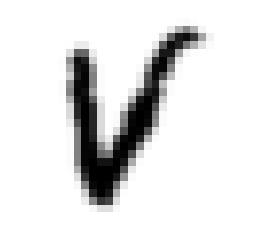

In [185]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = x_train[10]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [186]:
print(y_train[10])

22


In [187]:
# Reshape to 28 x 28 pixels
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train = x_train.astype('float32') / 255
print(x_train.shape)

(10000, 28, 28, 1)


In [194]:
a = np.zeros(56).reshape(2,28)
b = np.zeros(4200).reshape(30,140)

x_train_adj = []

for i in range(x_train.shape[0]):
   # print(x_train[i,:,:,0].shape)
    z = x_train[i,:,:,0]
    z = np.concatenate((z,a))
    z = np.concatenate((z,b), axis= 1)
  #  print(z.shape)
  #  print()
    x_train_adj.append(z)
x_train_adj = np.array(x_train_adj)
print(x_train_adj.shape)

(10000, 30, 168)


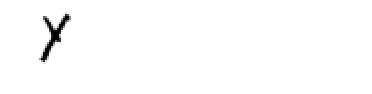

In [195]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = x_train_adj[0]
some_digit_image = some_digit.reshape(30, 168)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

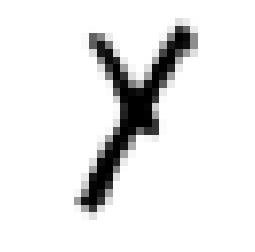

In [196]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = x_train[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [197]:
# Reshape to 28 x 28 pixels
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_val = x_val.astype('float32') / 255
print(x_val.shape)

(10000, 28, 28, 1)


In [198]:
a = np.zeros(56).reshape(2,28)
b = np.zeros(4200).reshape(30,140)

x_val_adj = []

for i in range(x_val.shape[0]):
   # print(x_val[i,:,:,0].shape)
    z = x_val[i,:,:,0]
    z = np.concatenate((z,a))
    z = np.concatenate((z,b), axis= 1)
  #  print(z.shape)
  #  print()
    x_val_adj.append(z)
x_val_adj = np.array(x_val_adj)
print(x_val_adj.shape)

(10000, 30, 168)


In [199]:
# Reshape to 28 x 28 pixels
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_test = x_test.astype('float32') / 255
print(x_test.shape)

(10000, 28, 28, 1)


In [200]:
a = np.zeros(56).reshape(2,28)
b = np.zeros(4200).reshape(30,140)

x_test_adj = []

for i in range(x_test.shape[0]):
   # print(x_test[i,:,:,0].shape)
    z = x_test[i,:,:,0]
    z = np.concatenate((z,a))
    z = np.concatenate((z,b), axis= 1)
  #  print(z.shape)
  #  print()
    x_test_adj.append(z)
x_test_adj = np.array(x_test_adj)
print(x_test_adj.shape)

(10000, 30, 168)


In [201]:
## Encode categorical label data
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_val = lb.fit_transform(y_val)
y_test = lb.fit_transform(y_test)

In [202]:
# Check the shape after the split
print(x_train_adj.shape)
print(y_train.shape)
print(x_val_adj.shape)
print(y_val.shape)
print(x_test_adj.shape)
print(y_test.shape)

(10000, 30, 168)
(10000, 26)
(10000, 30, 168)
(10000, 26)
(10000, 30, 168)
(10000, 26)


In [203]:
x_train_adj = x_train_adj.reshape(x_train_adj.shape[0], 30, 168, 1)
x_val_adj = x_val_adj.reshape(x_val_adj.shape[0], 30, 168, 1)
x_test_adj = x_test_adj.reshape(x_test_adj.shape[0], 30, 168, 1)

In [204]:
# Check the shape after the split
print(x_train_adj.shape)
print(y_train.shape)
print(x_val_adj.shape)
print(y_val.shape)
print(x_test_adj.shape)
print(y_test.shape)

(10000, 30, 168, 1)
(10000, 26)
(10000, 30, 168, 1)
(10000, 26)
(10000, 30, 168, 1)
(10000, 26)


In [205]:
# Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 168, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Add a Flatten layer to the model
model.add(layers.Flatten())
# Add a Dense layer with 64 units and relu activation
model.add(layers.Dense(64, activation='relu'))
# Add the last Dense layer.
model.add(layers.Dense(26, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ["accuracy"])

In [206]:
history = model.fit(x_train_adj, y_train,
          batch_size=32, epochs=5,
          verbose=1,
          validation_data=(x_val_adj, y_val))

Train on 10000 samples, validate on 10000 samples
Epoch 1/5
10000/10000 [==============================] - 135s 14ms/step - loss: 1.2669 - accuracy: 0.6228 - val_loss: 0.6751 - val_accuracy: 0.7872
Epoch 2/5
10000/10000 [==============================] - 152s 15ms/step - loss: 0.5010 - accuracy: 0.8403 - val_loss: 0.4709 - val_accuracy: 0.8533
Epoch 3/5
10000/10000 [==============================] - 161s 16ms/step - loss: 0.3552 - accuracy: 0.8833 - val_loss: 0.4364 - val_accuracy: 0.8632
Epoch 4/5
10000/10000 [==============================] - 166s 17ms/step - loss: 0.2724 - accuracy: 0.9052 - val_loss: 0.4320 - val_accuracy: 0.8743
Epoch 5/5
10000/10000 [==============================] - 157s 16ms/step - loss: 0.2253 - accuracy: 0.9229 - val_loss: 0.4111 - val_accuracy: 0.8786


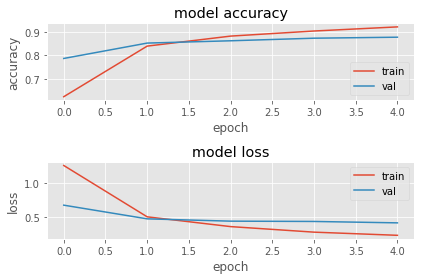

In [207]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

plt.tight_layout()

In [208]:
loss_and_metrics_train = model.evaluate(x_train_adj, y_train, verbose=2)
loss_and_metrics_test = model.evaluate(x_test_adj, y_test, verbose=2)
loss_and_metrics_val = model.evaluate(x_val_adj, y_val, verbose=2)

print("Train Loss", loss_and_metrics_train[0])
print("Train Accuracy", loss_and_metrics_train[1])
print()
print("Test Loss", loss_and_metrics_test[0])
print("Test Accuracy", loss_and_metrics_test[1])
print()
print("Train Loss", loss_and_metrics_val[0])
print("Train Accuracy", loss_and_metrics_val[1])

Train Loss 0.17945246617496013
Train Accuracy 0.9399999976158142

Test Loss 0.42131568754911425
Test Accuracy 0.8741000294685364

Train Loss 0.411134026825428
Train Accuracy 0.878600001335144


In [213]:
pred_class = model.predict_classes(X_test)
print(pred_class[0:10,])

[13 13 13 13 24  5 13 13  5  5]


In [223]:
pred = model.predict(X_test)
print(pred[0,:])

[8.6249088e-07 4.5570907e-09 3.2577628e-07 5.9248970e-07 2.8412119e-12
 1.8469256e-05 1.7843705e-06 1.0646380e-08 3.0272655e-08 3.3504646e-10
 2.5057967e-03 2.3950793e-06 1.6770605e-06 9.6745425e-01 6.4876016e-09
 1.7515566e-05 3.6193585e-05 2.6835108e-02 6.3483951e-10 6.4381620e-06
 3.7221602e-07 1.5426536e-07 7.8710101e-11 3.1151141e-03 2.6697212e-06
 1.9659727e-07]


In [212]:
# Check the shape after the split
print(x_train_adj.shape)
print(y_train.shape)
print(x_val_adj.shape)
print(y_val.shape)
print(x_test_adj.shape)
print(y_test.shape)
print(X_test.shape)

(10000, 30, 168, 1)
(10000, 26)
(10000, 30, 168, 1)
(10000, 26)
(10000, 30, 168, 1)
(10000, 26)
(10000, 30, 168, 1)


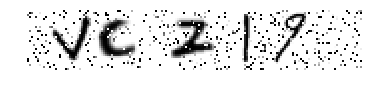

In [218]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X_test[1]
some_digit_image = some_digit.reshape(30, 168)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

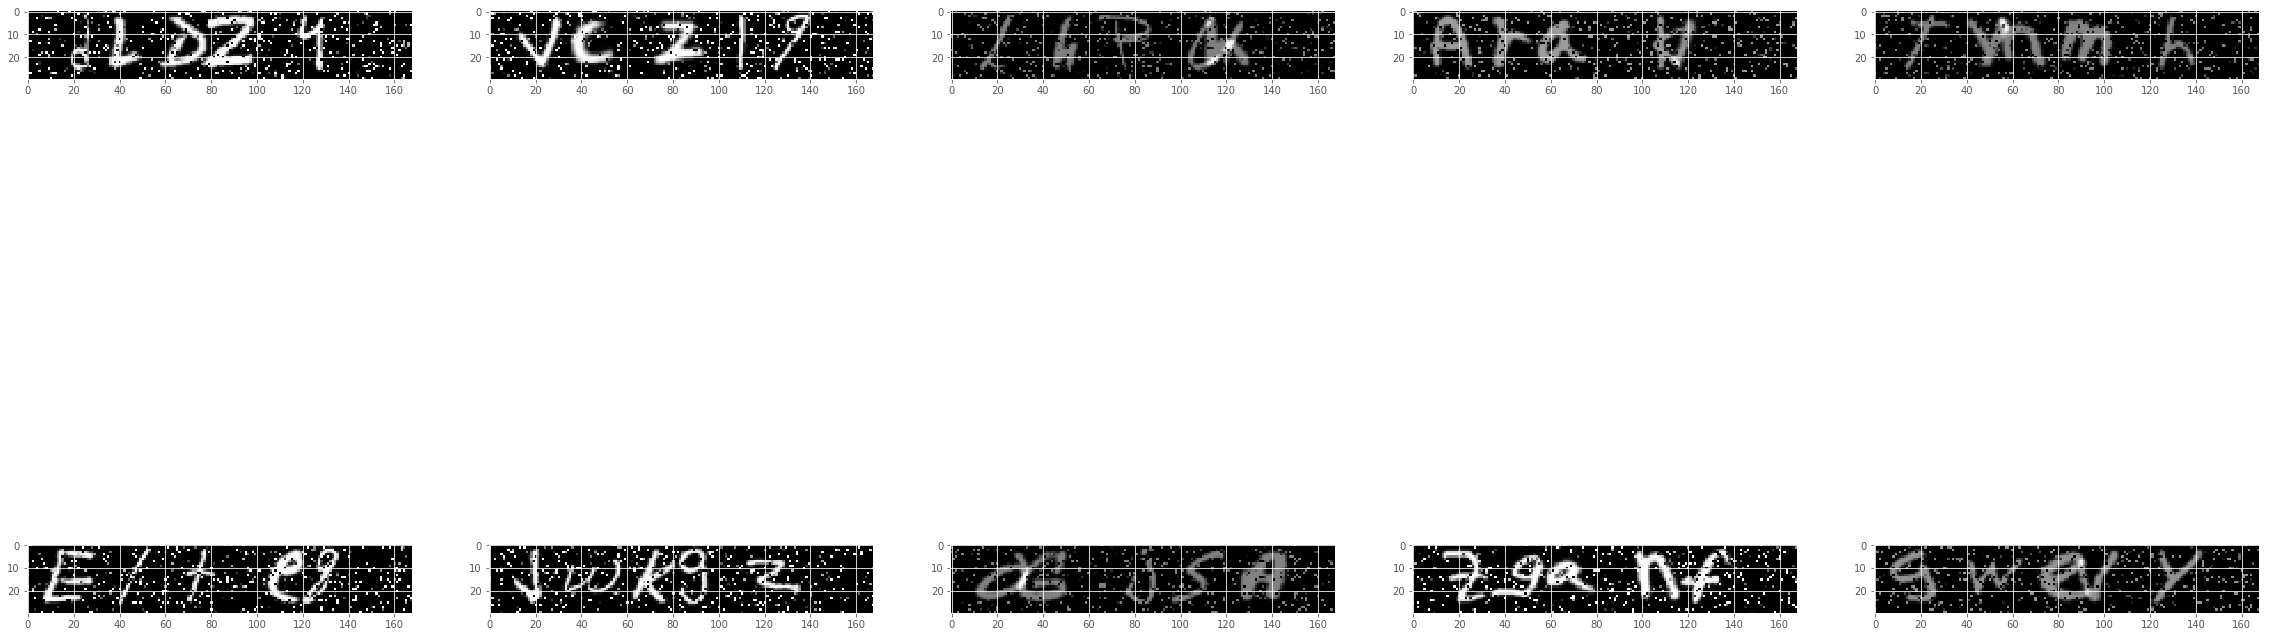

In [230]:
## Display example digits
plt.figure(figsize=(40,18))
for index, (image) in enumerate(X_test[0:10]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(np.reshape(image, (30,168)), cmap=plt.cm.gray)

In [ ]:
## idea: combinge 5 pictures and train the algo again

In [235]:
## Load data
with np.load("training-dataset.npz") as data:
    img = data["x"] ## test dataset
    lbl = data["y"]

In [236]:
## Split into train and test sets (80 vs 20%)
x_train, x_test, y_train, y_test = train_test_split(img, lbl, test_size=0.2, random_state=0)

In [237]:
## Split into train and val sets (80 vs 20%)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

In [238]:
## Shuffle the data - random splits
n = 50000
x_train, y_train = x_train[0:n], y_train[0:n]
x_test, y_test = x_test[0:n], y_test[0:n]
x_val, y_val = x_val[0:n], y_val[0:n]

In [239]:
# Check the shape after the split
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 784)
(50000,)
(19968, 784)
(19968,)
(24960, 784)
(24960,)


In [279]:
# Reshape to 28 x 28 pixels
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train = x_train.astype('float32') / 255
print(x_train.shape)

(50000, 28, 28, 1)


In [282]:
## Shuffle the data - random splits
n = 10000
x_train1 = x_train[0:10000]
x_train2 = x_train[10000:20000]
x_train3 = x_train[20000:30000]
x_train4 = x_train[30000:40000]
x_train5 = x_train[40000:50000]

In [303]:
x_train_new = []
for i in range(10000):
    w = np.hstack((x_train1[i], x_train2[i]))
    w = np.hstack((w, x_train3[i]))
    w = np.hstack((w, x_train4[i]))
    w = np.hstack((w, x_train5[i]))
    x_train_new.append(w)
x_train_new = numpy.array(x_train_new)
print(x_train_new.shape)

(10000, 28, 140, 1)


In [306]:
print(x_train_new[i,:,:,0].shape)

(28, 140)


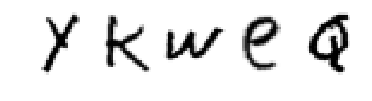

In [287]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = x_train_new[0]
some_digit_image = some_digit.reshape(28, 140)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [307]:
a = np.zeros(280).reshape(2,140)
b = np.zeros(840).reshape(30,28)

x_train_adj = []

for i in range(x_train_new.shape[0]):
   # print(x_train[i,:,:,0].shape)
    z = x_train_new[i,:,:,0]
    z = np.concatenate((z,a))
    z = np.concatenate((z,b), axis= 1)
  #  print(z.shape)
  #  print()
    x_train_adj.append(z)
x_train_adj = np.array(x_train_adj)
print(x_train_adj.shape)

(10000, 30, 168)


In [309]:
x_train_adj = x_train_adj.reshape(x_train_adj.shape[0], 30, 168, 1)
print(x_train_adj.shape)

(10000, 30, 168, 1)


In [298]:
## Encode categorical label data
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(y_train.shape)

(50000, 26)


In [299]:
## Shuffle the data - random splits
n = 10000
y_train1 = y_train[0:10000]
y_train2 = y_train[10000:20000]
y_train3 = y_train[20000:30000]
y_train4 = y_train[30000:40000]
y_train5 = y_train[40000:50000]

In [300]:
y_train_new = []
for i in range(10000):
    w = np.hstack((y_train1[i], y_train2[i]))
    w = np.hstack((w, y_train3[i]))
    w = np.hstack((w, y_train4[i]))
    w = np.hstack((w, y_train5[i]))
    y_train_new.append(w)
y_train_new = numpy.array(y_train_new)
print(y_train_new.shape)

(10000, 130)


In [301]:
print(y_train_new[0])
print(y_train_new.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
(10000, 130)


In [312]:
# Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 168, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Add a Flatten layer to the model
model.add(layers.Flatten())
# Add a Dense layer with 64 units and relu activation
model.add(layers.Dense(64, activation='relu'))
# Add the last Dense layer.
model.add(layers.Dense(130, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ["accuracy"])

In [313]:
history = model.fit(x_train_adj, y_train_new,
          batch_size=32, epochs=5,
          verbose=1)

Epoch 1/5
10000/10000 [==============================] - 110s 11ms/step - loss: 21.3127 - accuracy: 0.0743
Epoch 2/5
10000/10000 [==============================] - 109s 11ms/step - loss: 17.1033 - accuracy: 0.1434
Epoch 3/5
10000/10000 [==============================] - 111s 11ms/step - loss: 15.3467 - accuracy: 0.1652
Epoch 4/5
10000/10000 [==============================] - 119s 12ms/step - loss: 14.2917 - accuracy: 0.1717
Epoch 5/5
10000/10000 [==============================] - 111s 11ms/step - loss: 13.4805 - accuracy: 0.1808


In [330]:
loss_and_metrics_train = model.evaluate(x_train_adj, y_train_new, verbose=2)
loss_and_metrics_test = model.evaluate(X_test, pred, verbose=2)

print("Train Loss", loss_and_metrics_train[0])
print("Train Accuracy", loss_and_metrics_train[1])
print()
print("Test Loss", loss_and_metrics_test[0])
print("Test Accuracy", loss_and_metrics_test[1])

Train Loss 12.737786149597168
Train Accuracy 0.20800000429153442

Test Loss 3.9948938270568846
Test Accuracy 1.0


In [329]:
print(x_train_adj.shape)
print(y_train_new.shape)
print(X_test.shape)

(10000, 30, 168, 1)
(10000, 130)
(10000, 30, 168, 1)


In [320]:
pred_class = model.predict_classes(X_test)
print(pred_class[0])

35


In [318]:
pred = model.predict(X_test)
print(pred.shape)

(10000, 130)


In [321]:
print(pred[0])

[0.01175056 0.01898247 0.00416265 0.01284299 0.00418577 0.00381783
 0.02172656 0.01121537 0.00722618 0.00668931 0.00149884 0.01293585
 0.00218001 0.00317768 0.0016378  0.00190594 0.01344813 0.00314043
 0.00464665 0.01086498 0.00467058 0.00196856 0.00430863 0.00817753
 0.0062793  0.01029992 0.00181638 0.00873149 0.00116989 0.01803391
 0.00194841 0.00123902 0.0043484  0.00761697 0.01847728 0.05410193
 0.00369998 0.01658058 0.00039709 0.00131787 0.0031176  0.00275678
 0.00500323 0.00042345 0.043264   0.00452055 0.00064135 0.00190632
 0.00439515 0.00370751 0.01295082 0.00215838 0.02661867 0.0054321
 0.00077585 0.02373308 0.00211169 0.00081674 0.00499911 0.03588109
 0.00060574 0.01124553 0.0137427  0.00203739 0.00280828 0.00933638
 0.02304423 0.00059532 0.00797798 0.00087299 0.02026387 0.00229055
 0.02796161 0.00235518 0.00465059 0.00488042 0.0015128  0.00774859
 0.0176777  0.00757504 0.00269611 0.03126732 0.00366656 0.00318876
 0.01070894 0.00569246 0.00179194 0.01342952 0.00026066 0.00067

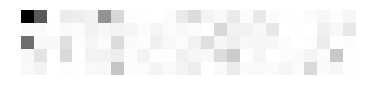

In [325]:
### %matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = pred[3].reshape(5,26)
#some_digit_image = some_digit.reshape(28, 140)
plt.imshow(some_digit, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()